In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import pickle
import re
import statsmodels.api as sm
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [3]:
with open(r"./../pickles/movie_DF_0430.p", "rb") as input_file:
    mov = pickle.load(input_file)

# Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [14]:
#prepend intercept column

mov=sm.add_constant(mov, prepend=True)

In [17]:
mov.columns

Index([                   u'const',                 u'director',
                    u'distributor',             u'genre_bomojo',
                         u'rating',                    u'title',
                    u'releaseDate',                   u'isCult',
                     u'canontitle',             u'num_theaters',
                      u'leadActor',             u'runtime_mins',
                    u'releaseYear',          u'rev_opening_ADJ',
             u'rev_totalGross_ADJ',          u'prod_budget_ADJ',
                     u'CULT_INDEX', u'is_missing_prodbudgetADJ',
                          u'genre',             u'directorTier',
                     u'studioTier'],
      dtype='object')

In [138]:
#now, let's say rev_totalGross_ADJ is the dependent variable, use the constant column to predict that

fit1 = sm.OLS(mov.loc[:,'rev_totalGross_ADJ'],mov.iloc[:,0]).fit()
fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rev_totalGross_ADJ   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 01 May 2016   Prob (F-statistic):                nan
Time:                        13:12:32   Log-Likelihood:            -1.0505e+05
No. Observations:                5042   AIC:                         2.101e+05
Df Residuals:                    5041   BIC:                         2.101e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.281e+08   3.81e+06     33.603      0.000      1.21e+08  1.36e+08
==============================================================================
Omnibus:                     7183.092   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2526373.542
Skew:                           8.393   Prob(JB):                         0.00
Kurtosis:                     111.369   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

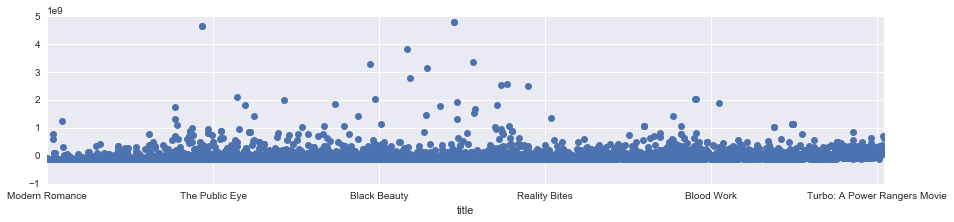

In [139]:
fit1.resid.plot(style='o', figsize=(15,3))

# since this is a no-constant regression, and the constant = mean of the dependent variable, the residual errors = 
# total error in the system (teh variance of the dependent variable): SStotal = sum of (yi - mean(y))^2

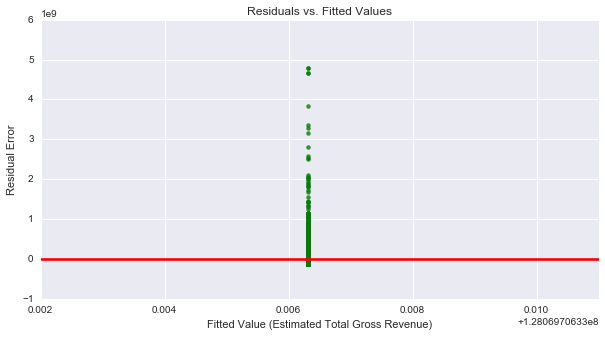

In [142]:
#residual error versus fitted values?
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=fit1.fittedvalues,
            y=fit1.resid, 
            marker='o',
            fit_reg=True,
            scatter=True,
            scatter_kws={"color": 'green'},
            color='r',
            ax=ax)
#plt.xlim(-.5,1)
plt.xlabel('Fitted Value (Estimated Total Gross Revenue)')
plt.ylabel('Residual Error')
plt.title('Residuals vs. Fitted Values')

# as expected, since the "fitted values" are just the mean of the dependent variable, the residual errors are the same
# as the error in the dependent variable. So we expect to see the residual error the same as the mean of the dependent
# variable.

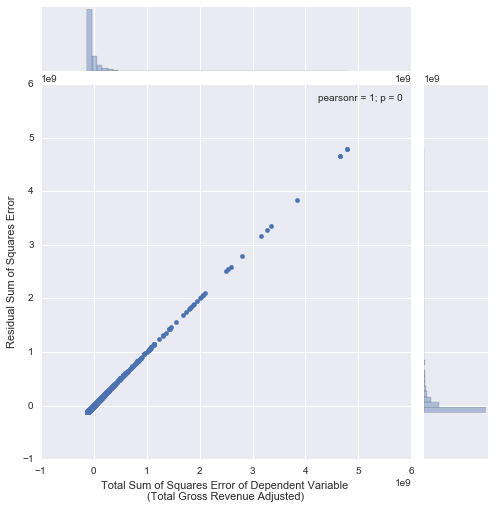

In [186]:
#distribution of residual errors
#should be the same as the error distribution for the dependent variable

sns.jointplot(x=mov.rev_totalGross_ADJ-np.mean(mov.rev_totalGross_ADJ),y=fit1.resid,size=7).set_axis_labels("Total Sum of Squares Error of Dependent Variable \n(Total Gross Revenue Adjusted)", "Residual Sum of Squares Error")

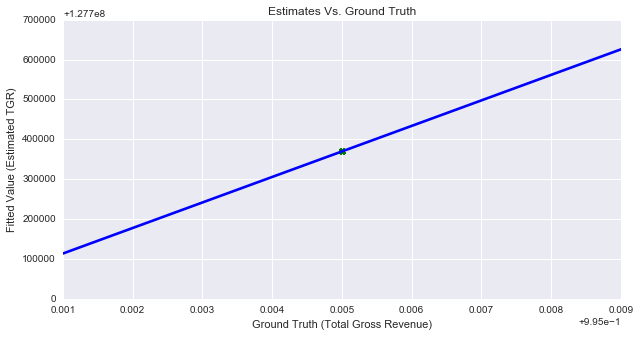

In [189]:
#fitted values Vs. ground truth total gross revenue
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=fit1.model.exog,
            y=fit1.fittedvalues, 
            marker='x',
            fit_reg=True,
            scatter=True,
            scatter_kws={"color": 'green'},
            y_jitter=0.5,
            color='b',
            ax=ax)
#plt.xlim(-.5,1)
plt.xlabel('Ground Truth (Total Gross Revenue)')
plt.ylabel('Fitted Value (Estimated TGR)')
plt.title('Estimates Vs. Ground Truth')

#no constant model with no predictors always predicts the mean of the dependent variable...

## Challenge 1 Conclusions  
No-Intercept regression with a constant estimates the mean of the dependent variable as the prediction. The residual error in this model is equal to the error in the dependent variable, thus resulting in an adjusted R<sup>2</sup> of 0. This can be seen in teh distribution of residual errors versus the error in dependent variable joint plot above. Finally, as expected the fitted values (mean of dependent variable) versus the dependent variabel ground truth values plot, is merely a point indicating the mean of the dpeendent variable (plot above).

<hr>

# Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [192]:
#let's use the "rev_opening_ADJ" numeric variable to predict "rev_totalGross_ADJ"
#create a submodel of the constant term and the two variables above
mov2 = mov.loc[:,['const','rev_opening_ADJ','rev_totalGross_ADJ']]

In [193]:
mov2.shape

(5042, 3)

In [243]:
# model: total gross revenue ~ intercept + opening revenue
fit2 = sm.OLS(mov2.rev_totalGross_ADJ, mov2.loc[:,['const','rev_opening_ADJ']]).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rev_totalGross_ADJ   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sun, 01 May 2016   Prob (F-statistic):           3.38e-17
Time:                        14:41:47   Log-Likelihood:            -1.0501e+05
No. Observations:                5042   AIC:                         2.100e+05
Df Residuals:                    5040   BIC:                         2.100e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            1.217e+08   3.86e+06     31.530      0.000      1.14e+08  1.29e+08
rev_opening_ADJ     0.0004   4.95e-05      8.463      0.000         0.000     0.001
==============================================================================
Omnibus:                     7058.501   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2251151.657
Skew:                           8.145   Prob(JB):                         0.00
Kurtosis:                     105.226   Cond. No.                     7.95e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
fit2.model.exog_names

['const', 'rev_opening_ADJ']

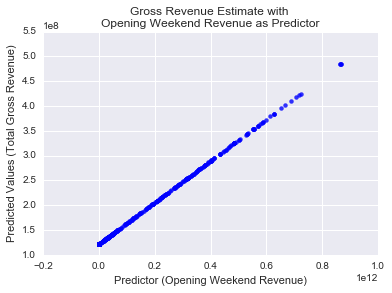

In [249]:
# predicted values against feature variable: rev_opening_ADJ
sns.regplot(x=mov2.rev_opening_ADJ,
           y=fit2.fittedvalues,
           fit_reg=False,
           color='blue')
plt.ylabel('Predicted Values (Total Gross Revenue)')
plt.xlabel('Predictor (Opening Weekend Revenue)')
plt.title('Gross Revenue Estimate with \nOpening Weekend Revenue as Predictor')

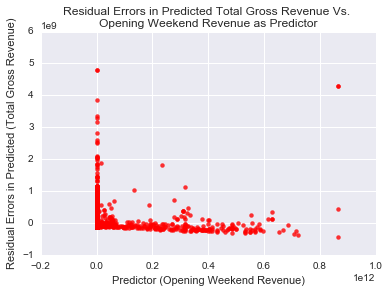

In [254]:
#residuals against feature variable
sns.regplot(x=mov2.rev_opening_ADJ,
           y=fit2.resid,
           fit_reg=False,
           color='red')
plt.ylabel('Residual Errors in Predicted (Total Gross Revenue)')
plt.xlabel('Predictor (Opening Weekend Revenue)')
plt.title('Residual Errors in Predicted Total Gross Revenue Vs. \nOpening Weekend Revenue as Predictor')


## Challenge 2 Conclusions  
The Adjusted R<sup>2</sup> between the numerical predictor of opening weekend revenue is only 0.14. This indicates that this predictor accounts only for about a 14% variation in the dependent gross revenue variable. The predictions are very close to the 

<hr>

# Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [372]:
mov2['genre']=mov['genre']

ValueError: cannot reindex from a duplicate axis

In [259]:
mov2.shape

(5042, 4)

In [261]:
#create dummies for genre
genredums=pd.get_dummies(mov2.genre,prefix='genre')
genredums.drop('genre_Unknown',axis=1,inplace=True)

In [263]:
mov2 = pd.concat([mov2,genredums],axis=1)

In [268]:
mov2.drop(['genre'],inplace=True,axis=1)
mov2.head(2)

,const,rev_opening_ADJ,rev_totalGross_ADJ,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Drama,genre_Family,...,genre_Horror,genre_Music,genre_Period,genre_Romance,genre_Romantic,genre_Sci-Fi,genre_Sports,genre_Thriller,genre_War,genre_Western
title,,,,,,,,,,,,,,,,,,,,,
Modern Romance,1,57915.000000,2.891783e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
After Hours,1,111380.657143,6.375674e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
indices=[0,1,3]
indices.extend([int(i) for i in range(4,22)])
#mov2.iloc[:,indices]

In [371]:
#intercept is genre=='unknown'
fit3 = sm.OLS(mov2.rev_totalGross_ADJ, mov2.iloc[:,indices]).fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rev_totalGross_ADJ   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     34.74
Date:                Sun, 01 May 2016   Prob (F-statistic):          1.29e-107
Time:                        18:40:37   Log-Likelihood:                -95171.
No. Observations:                4784   AIC:                         1.904e+05
Df Residuals:                    4766   BIC:                         1.905e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            2.275e+07   4.03e+06      5.649      0.000      1.49e+07  3.06e+07
rev_opening_ADJ  1.281e+08   1.81e+07      7.073      0.000      9.26e+07  1.64e+08
genre_Action     1.127e+08   6.26e+06     18.005      0.000         1e+08  1.25e+08
genre_Animation  1.207e+08   9.63e+06     12.534      0.000      1.02e+08   1.4e+08
genre_Comedy     6.753e+07    5.4e+06     12.505      0.000      5.69e+07  7.81e+07
genre_Crime      5.313e+07   7.82e+06      6.796      0.000      3.78e+07  6.85e+07
genre_Drama      4.157e+07   6.43e+06      6.461      0.000       2.9e+07  5.42e+07
genre_Family     1.023e+08   7.96e+06     12.851      0.000      8.67e+07  1.18e+08
genre_Fantasy    9.383e+07    1.1e+07      8.540      0.000      7.23e+07  1.15e+08
genre_Horror     6.909e+07   7.59e+06      9.101      0.000      5.42e+07   8.4e+07
genre_Music      1.059e+08   1.08e+07      9.854      0.000      8.49e+07  1.27e+08
genre_Period     8.161e+07   9.06e+06      9.003      0.000      6.38e+07  9.94e+07
genre_Romance    7.835e+07   1.08e+07      7.242      0.000      5.71e+07  9.96e+07
genre_Romantic   8.224e+07   7.22e+06     11.388      0.000      6.81e+07  9.64e+07
genre_Sci-Fi     1.135e+08   8.56e+06     13.256      0.000      9.67e+07   1.3e+08
genre_Sports     8.899e+07   1.01e+07      8.769      0.000      6.91e+07  1.09e+08
genre_Thriller   8.259e+07   8.54e+06      9.668      0.000      6.58e+07  9.93e+07
genre_War        9.104e+07   1.45e+07      6.285      0.000      6.26e+07  1.19e+08
==============================================================================
Omnibus:                     1742.918   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5838.636
Skew:                           1.865   Prob(JB):                         0.00
Kurtosis:                       6.921   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 3 Conclusions  

The intercept represent genre "unknown". Holding all other predictors constant this has a positive effect on the slope of the solution. However, the intercept is not statistically significant, indicating that the chance that the effect is 0 is *not* a statistical anomaly. Genre "Foreign" doesn't seem to be a significant predictor either. The total revenue is much more heavily inluenced by the genres as opposed to the opening weekend revenue. Overall, this linear combination of opening weekend revenue and the movie genres only accounts for about **5%** of the total variation in gross revenue. This model doesn't have very good predictive power.  


<hr>

# Challenge 4  

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.



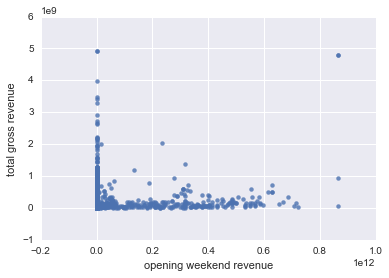

In [292]:
# freestyle EDA

# First, let's take a look at relationship between my numerical predictor and gross revenue
sns.regplot(x='rev_opening_ADJ',
           y='rev_totalGross_ADJ',
           data=mov2,
            fit_reg=False,
           marker='o')
plt.xlabel('opening weekend revenue')
plt.ylabel('total gross revenue')

In [330]:
#no real rel between numeric and dependent
#look at boxplots for categoricals
mov2['genre']=mov['genre']

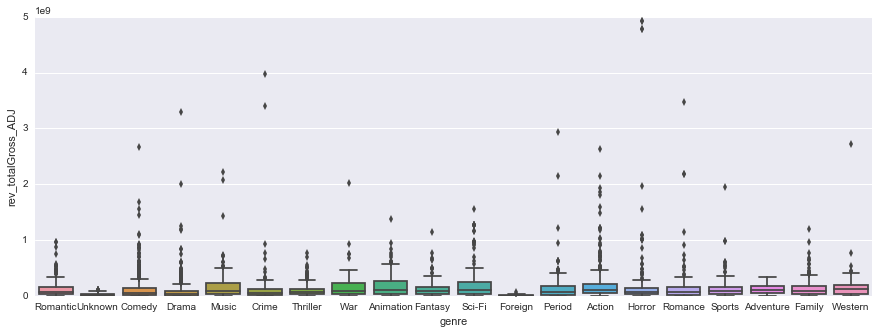

In [335]:
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(x=mov2.genre,
           y=mov2.rev_totalGross_ADJ,ax=ax)

In [336]:
#most total gross above 1+e9 seem to be outliers in every genre. let's remove those
mov2=mov2[mov2.rev_totalGross_ADJ<1e9]

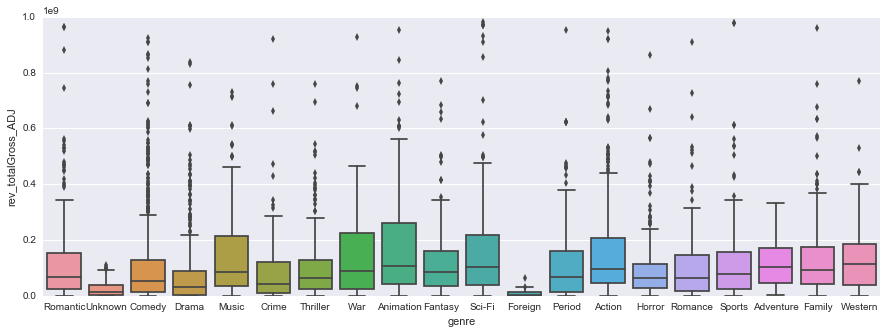

In [337]:
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(x=mov2.genre,
           y=mov2.rev_totalGross_ADJ,ax=ax)

In [339]:
#revenue does seem to vary amongst different genres; let's make sure the counts are there
mov2.genre.value_counts(normalize=True, sort=True, ascending=False)

Comedy       0.177180
Unknown      0.138610
Action       0.101045
Drama        0.091201
Romantic     0.063278
Horror       0.054640
Crime        0.050623
Family       0.048614
Sci-Fi       0.041382
Thriller     0.039976
Period       0.035155
Animation    0.031338
Sports       0.026718
Music        0.023704
Romance      0.022901
Fantasy      0.022298
War          0.012455
Western      0.008437
Adventure    0.007232
Foreign      0.003214
Name: genre, dtype: float64

In [340]:
#Foreign, Adventure, Western combined make up less than 1% of the dataset. We're going to drop these for lack of data points.
mov2=mov2[~mov2.genre.isin(['Western','Adventure','Foreign'])]

In [342]:
#be sure to remove corresponding dummies
mov2.drop(['genre_Western','genre_Adventure','genre_Foreign'], axis=1, inplace=True)

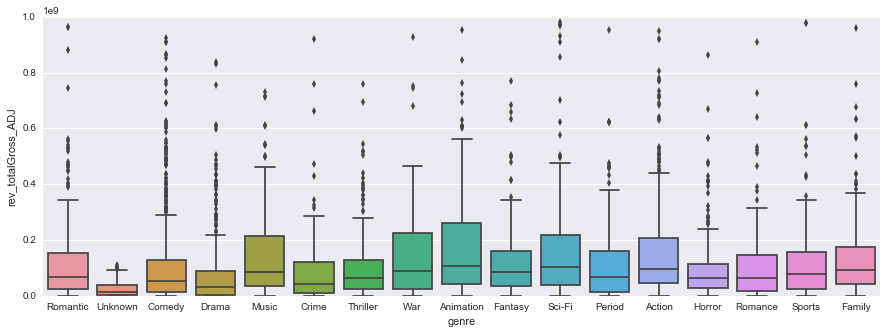

In [341]:
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(x=mov2.genre,
           y=mov2.rev_totalGross_ADJ,ax=ax)

In [343]:
#remove some more outleirs of revenue over 0.6e9
mov2=mov2[mov2.rev_totalGross_ADJ<0.6e9]

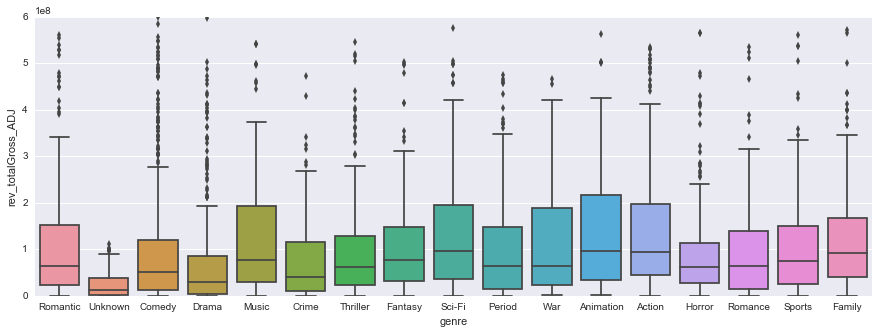

In [344]:
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(x=mov2.genre,
           y=mov2.rev_totalGross_ADJ,ax=ax)

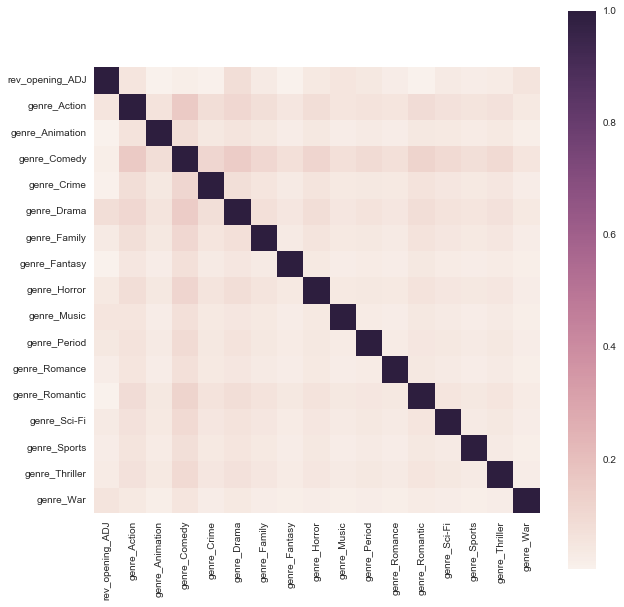

In [353]:
#now, let's check for multicollinearity
indices=[1]
indices.extend([i for i in range(3,19)])
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(mov2.iloc[:,indices].corr()), square=True, ax=ax)

In [354]:
indices.insert(0, 0)#constant

In [364]:
#scale the rev_opening feature
mov2.rev_opening_ADJ = (mov2.rev_opening_ADJ - mov2.rev_opening_ADJ.mean()) / (mov2.rev_opening_ADJ.max() - mov2.rev_opening_ADJ.min())

In [370]:
#features are accetpable, let's fit
fit4 = sm.OLS(mov2.rev_totalGross_ADJ, mov2.iloc[:,indices]).fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rev_totalGross_ADJ   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     34.74
Date:                Sun, 01 May 2016   Prob (F-statistic):          1.29e-107
Time:                        18:39:52   Log-Likelihood:                -95171.
No. Observations:                4784   AIC:                         1.904e+05
Df Residuals:                    4766   BIC:                         1.905e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            2.275e+07   4.03e+06      5.649      0.000      1.49e+07  3.06e+07
rev_opening_ADJ  1.281e+08   1.81e+07      7.073      0.000      9.26e+07  1.64e+08
genre_Action     1.127e+08   6.26e+06     18.005      0.000         1e+08  1.25e+08
genre_Animation  1.207e+08   9.63e+06     12.534      0.000      1.02e+08   1.4e+08
genre_Comedy     6.753e+07    5.4e+06     12.505      0.000      5.69e+07  7.81e+07
genre_Crime      5.313e+07   7.82e+06      6.796      0.000      3.78e+07  6.85e+07
genre_Drama      4.157e+07   6.43e+06      6.461      0.000       2.9e+07  5.42e+07
genre_Family     1.023e+08   7.96e+06     12.851      0.000      8.67e+07  1.18e+08
genre_Fantasy    9.383e+07    1.1e+07      8.540      0.000      7.23e+07  1.15e+08
genre_Horror     6.909e+07   7.59e+06      9.101      0.000      5.42e+07   8.4e+07
genre_Music      1.059e+08   1.08e+07      9.854      0.000      8.49e+07  1.27e+08
genre_Period     8.161e+07   9.06e+06      9.003      0.000      6.38e+07  9.94e+07
genre_Romance    7.835e+07   1.08e+07      7.242      0.000      5.71e+07  9.96e+07
genre_Romantic   8.224e+07   7.22e+06     11.388      0.000      6.81e+07  9.64e+07
genre_Sci-Fi     1.135e+08   8.56e+06     13.256      0.000      9.67e+07   1.3e+08
genre_Sports     8.899e+07   1.01e+07      8.769      0.000      6.91e+07  1.09e+08
genre_Thriller   8.259e+07   8.54e+06      9.668      0.000      6.58e+07  9.93e+07
genre_War        9.104e+07   1.45e+07      6.285      0.000      6.26e+07  1.19e+08
==============================================================================
Omnibus:                     1742.918   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5838.636
Skew:                           1.865   Prob(JB):                         0.00
Kurtosis:                       6.921   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

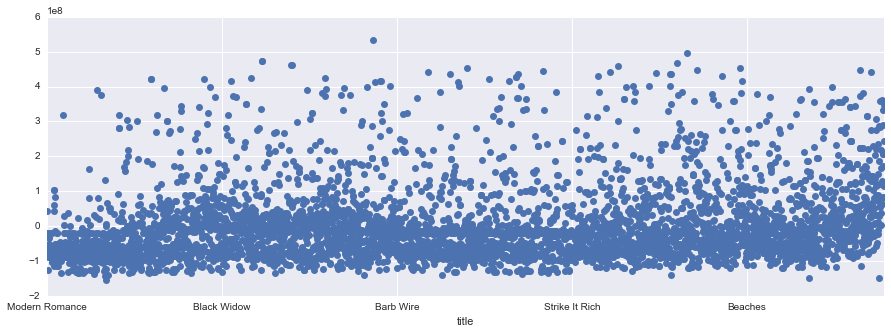

In [360]:
# are errors normally distributed?
fit4.resid.plot(style='o', figsize=(15,5))

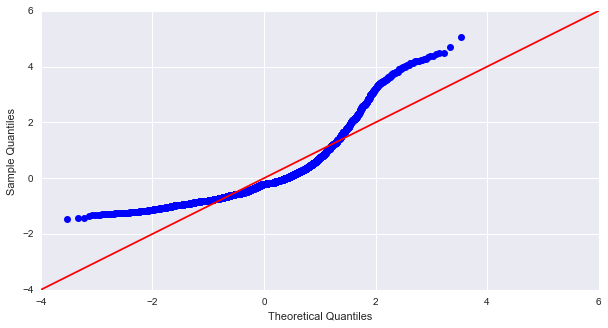

In [363]:
fig, ax = plt.subplots(figsize=(10,5))
fig4=sm.qqplot(fit4.resid, fit=True, line='45',ax=ax)

## Challenge 4 Conclusions  
- Removing outliers helped the model  
- Removing underrepresented categories improved the adjusted R<sup>2</sup>
- The errors are still not normally distributed, there must be some hidden feature interaction that's untried. further investigation required.  

<hr>

# Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [374]:
mov2.head(2)

,const,rev_opening_ADJ,rev_totalGross_ADJ,genre_Action,genre_Animation,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Music,genre_Period,genre_Romance,genre_Romantic,genre_Sci-Fi,genre_Sports,genre_Thriller,genre_War,genre
title,,,,,,,,,,,,,,,,,,,,
Modern Romance,1,-0.016963,2.891783e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Romantic
After Hours,1,-0.016963,6.375674e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown


In [380]:
indices

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [381]:
X_train, X_test, y_train, y_test = train_test_split(mov2.iloc[:,indices], mov2.iloc[:,2], test_size=0.3)
lm = sm.OLS(y_train,X_train)
fit5=lm.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rev_totalGross_ADJ   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.59
Date:                Sun, 01 May 2016   Prob (F-statistic):           3.50e-70
Time:                        18:48:21   Log-Likelihood:                -66648.
No. Observations:                3348   AIC:                         1.333e+05
Df Residuals:                    3330   BIC:                         1.334e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             2.32e+07   4.92e+06      4.716      0.000      1.36e+07  3.28e+07
rev_opening_ADJ  1.169e+08   2.26e+07      5.163      0.000      7.25e+07  1.61e+08
genre_Action     1.124e+08   7.58e+06     14.815      0.000      9.75e+07  1.27e+08
genre_Animation  1.141e+08   1.18e+07      9.714      0.000      9.11e+07  1.37e+08
genre_Comedy     6.717e+07   6.56e+06     10.232      0.000      5.43e+07     8e+07
genre_Crime      4.889e+07   9.85e+06      4.964      0.000      2.96e+07  6.82e+07
genre_Drama      4.598e+07    7.8e+06      5.896      0.000      3.07e+07  6.13e+07
genre_Family     1.079e+08    9.6e+06     11.232      0.000       8.9e+07  1.27e+08
genre_Fantasy    9.605e+07   1.29e+07      7.450      0.000      7.08e+07  1.21e+08
genre_Horror     7.037e+07   9.14e+06      7.702      0.000      5.25e+07  8.83e+07
genre_Music      1.015e+08   1.27e+07      7.995      0.000      7.66e+07  1.26e+08
genre_Period     8.111e+07   1.09e+07      7.443      0.000      5.97e+07  1.02e+08
genre_Romance    9.262e+07    1.3e+07      7.105      0.000      6.71e+07  1.18e+08
genre_Romantic   8.089e+07   8.81e+06      9.177      0.000      6.36e+07  9.82e+07
genre_Sci-Fi     1.208e+08   1.05e+07     11.519      0.000         1e+08  1.41e+08
genre_Sports     9.275e+07   1.22e+07      7.619      0.000      6.89e+07  1.17e+08
genre_Thriller   8.756e+07   1.05e+07      8.347      0.000       6.7e+07  1.08e+08
genre_War        1.011e+08   1.88e+07      5.372      0.000      6.42e+07  1.38e+08
==============================================================================
Omnibus:                     1216.839   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4004.390
Skew:                           1.861   Prob(JB):                         0.00
Kurtosis:                       6.853   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [382]:
pred5 = fit5.predict(X_test)

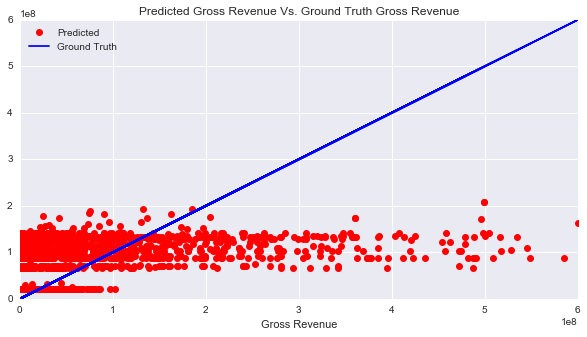

In [383]:
#compare predictions versus ground truth
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y_test, pred5, 'ro', label="Predicted")
ax.plot(y_test, y_test, 'b-', label="Ground Truth")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
plt.title('Predicted Gross Revenue Vs. Ground Truth Gross Revenue')
plt.xlabel('Gross Revenue')
ax.legend(loc="best")

## Post-Mortem for Challenge 5  
- Model has poor predictive power
- Errors are not normal, feature interactions not explored  
- Model seems heavily biased; needs more features, possibly more data